## Part 5 : Evaluation and generating caption on test set

In this part we load our trained model and generate captions on test set images.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan  5 17:04:26 2020

@author: dhamuk
"""


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding,BatchNormalization, Dropout, TimeDistributed, Dense,Concatenate, RepeatVector, Activation, Input, add
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input
from tqdm import tqdm
from keras.preprocessing import image
from keras import backend 
from keras.models import load_model
from PIL import Image
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import Utils as util


###get features and inputs####
root_path = 'Y:/Flickr_Data/'

root_path_features = 'Y:/lab2/ShowTell_Vinit_5thMorn/showtell/data'
trainfile=root_path+'Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt'
train = util.loadDataset(trainfile)
descriptions_map = util.getDescriptions_dataset(root_path_features+'/descriptions.txt',train)

max_length = util.max_length(descriptions_map)

###photo features
features=pickle.load(open(root_path_features+'/featuresNew.pkl', 'rb'))
###trained tokenizer
tokenizer=pickle.load(open(root_path_features+'/tokernizer.p', 'rb')) 


###load vocab
vocab= [] 
vocab = list(set(vocab))
vocab= pickle.load(open(root_path_features+'/vocab_new.p', 'rb'))
vocab_size = len(vocab)

###Load trained model
model_path='Y:/lab2/ShowTell/showTellFulltrain4.h5'                 
model=load_model(model_path)



###greedy search####
def predict_captions_tokenized(image_file,model,features):
    
    caption=['<start>']
    
    while 1:       
        current_seq=tokenizer.texts_to_sequences([caption])[0]
        current_seq = sequence.pad_sequences([current_seq], maxlen=max_length, padding='post')       
        e = features[image_file]
        preds = model.predict([np.array([e]), np.array(current_seq)])       
        yhat=np.argmax(preds)
        word_pred=util.word_for_id(yhat,tokenizer)        
        caption.append(word_pred)            
        if word_pred == "end" or len(caption) > max_length:    
            break
            
    return ' '.join(map(str,caption[1:-1]))

   


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Image :  2295750198_6d152d7ceb.jpg


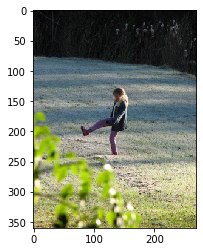

caption generated == a young boy in a pink shirt is playing with a toy

Image :  241347204_007d83e252.jpg


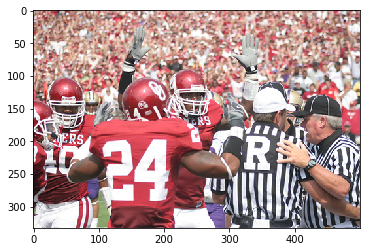

caption generated == football players in red and white are playing soccer

Image :  2654514044_a70a6e2c21.jpg


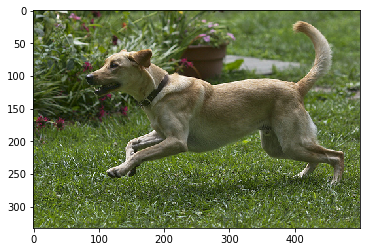

caption generated == dog running through the grass

Image :  3154641421_d1b9b8c24c.jpg


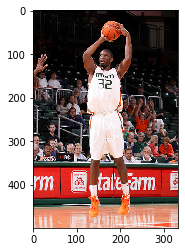

caption generated == baseball game

Image :  3744832122_2f4febdff6.jpg


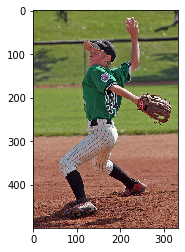

caption generated == baseball game

Image :  3745451546_fc8ec70cbd.jpg


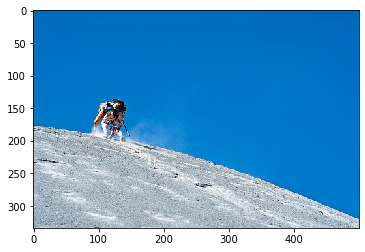

caption generated == the snow covered mountain

Image :  3747543364_bf5b548527.jpg


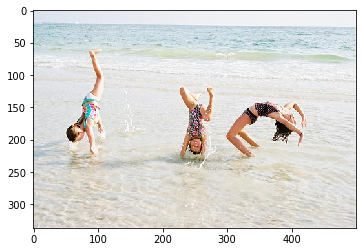

caption generated == water


In [3]:
####generate captions on test images#####

import matplotlib.pyplot as plt
import os
dir='Y:/lab2/ShowTell/image'
for file in os.listdir(dir):
    print()
    print('Image : ',file)
    im=Image.open(dir+'/'+file)
    plt.imshow(im)
    plt.show()
    print ('caption generated ==', predict_captions_tokenized(file,model,features))
    

## Results 

We evaluated the model on test set and calcuated BLEU score,given below :

BLEU-1: 0.338757
BLEU-2: 0.190398
BLEU-3: 0.118887
BLEU-4: 0.050131

We observed that the model generated better captions for certain objects im images like dogs ,persons ,etc. However it does not generate complex captions when the images are complex or objects in images are not easily identifiable.
To improve the caption generation we can implement Beam search algorithm.Also we can filter the vocabulary to remove punctuations and filler words.
